In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
print("Hello in ")
print("...in larger font ")

#HATE SPEECH DETECTION CHATBOT


### 1. Data Understanding
### 2. Data Preparation
### 3. Data Modeling
### 4. Data Validation


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
## Importing the required files
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import string
from nltk.corpus import stopwords
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# uploading dataset
from google.colab import files
uploaded = files.upload()

Saving labeled_data.csv to labeled_data.csv


##Understanding Dataset

In [ ]:
# importing dataset as tweet_df
import io
tweet_df = pd.read_csv(io.BytesIO(uploaded['labeled_data.csv']))


In [ ]:
tweet_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
 #dimensionality of dataset
tweet_df.shape

(24783, 7)

In [ ]:
tweet_df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<Axes: xlabel='label', ylabel='count'>

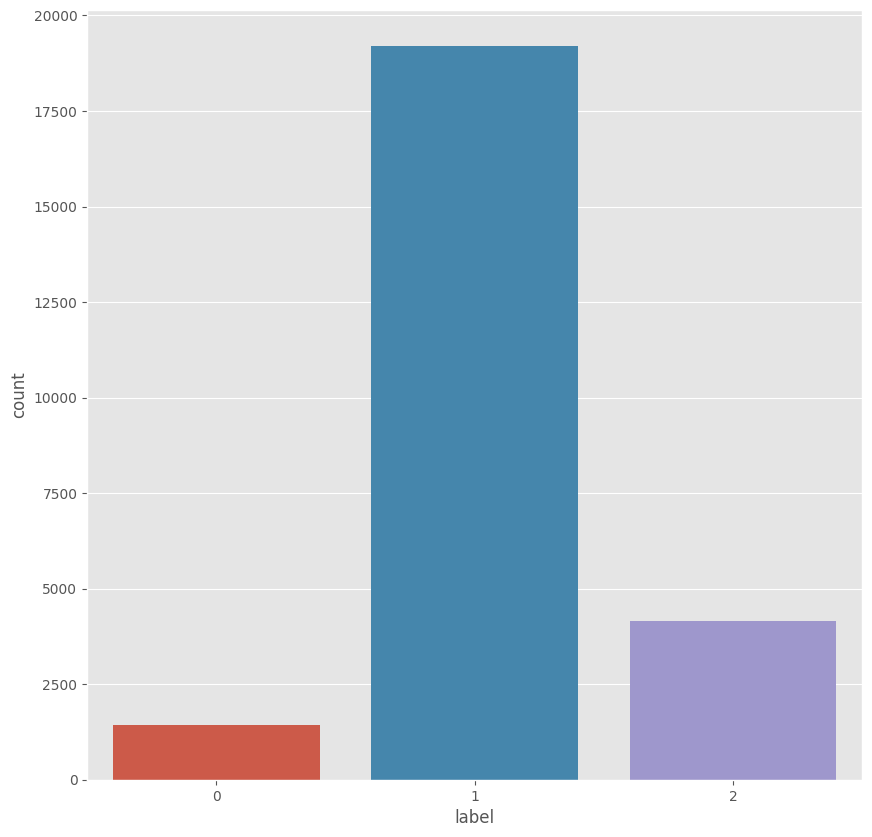

In [ ]:
# Count Plot (Visualisation)
fig = plt.figure(figsize=(10,10))
sns.countplot(x='class', data = tweet_df)

##Data Preprocessing

In [ ]:
tweet_df.isna().sum().sum()

0

In [ ]:
tweet_df = tweet_df.rename(columns={'class': 'label'})

In [ ]:
# Extracting columns 'label' and 'tweet'
tweet_df = tweet_df[['label','tweet']]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def data_processing(text):
    pattern = r'https?://\S+|www\.\S+'
    text = re.sub(pattern, '', text)
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'ð', '', text)
    text = re.sub(r'rt', '', text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    lemmatizer = WordNetLemmatizer()
    stopwords_set = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in nopunc.split() if word.lower() not in stopwords_set]

    return tokens


##Modeling

In [ ]:
# splitting data into training and testing
X = tweet_df['tweet']
y = tweet_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model 1 : Using Random Forest Classifier

In [ ]:
pipeline = Pipeline([
     ('tfidf', TfidfVectorizer(analyzer = data_processing)),
    ('smote', SMOTE(sampling_strategy = {0: 4052}, random_state = 101)),
    ('classifier', RandomForestClassifier(random_state = 101))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function data_processing at 0x7f332c9881f0>)),
                ('smote', SMOTE(random_state=101, sampling_strategy={0: 4052})),
                ('classifier', RandomForestClassifier(random_state=101))])

In [ ]:
PP = pipeline.predict(X_test)

print(classification_report(y_test, PP))

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       417
           1       0.91      0.96      0.93      5789
           2       0.85      0.79      0.82      1229

    accuracy                           0.89      7435
   macro avg       0.76      0.67      0.70      7435
weighted avg       0.88      0.89      0.88      7435



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, PP, average=None, labels=[0, 1, 2])

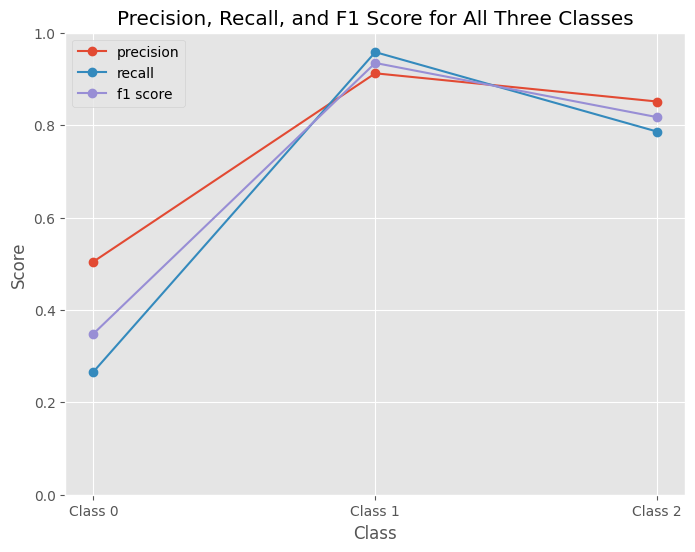

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot([0, 1, 2], precision, 'o-', label='precision')
ax.plot([0, 1, 2], recall, 'o-', label='recall')
ax.plot([0, 1, 2], f1_score, 'o-', label='f1 score')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Precision, Recall, and F1 Score for All Three Classes')

ax.legend(loc='best')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, PP)
print(cm)

[[ 111  281   25]
 [  99 5546  144]
 [  10  253  966]]


##Model 2: Logistic Regression

In [ ]:
p1 = Pipeline([
     ('tfidf', TfidfVectorizer(analyzer = data_processing)),
    ('smote', SMOTE(sampling_strategy = {0: 4052}, random_state = 101)),
    ('classifier', LogisticRegression(max_iter=1000,random_state = 101))
])



In [ ]:
p1.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function data_processing at 0x7f332c9881f0>)),
                ('smote', SMOTE(random_state=101, sampling_strategy={0: 4052})),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=101))])

In [ ]:
PLogR = pipeline.predict(X_test)

print(classification_report(y_test, PLogR))

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       417
           1       0.91      0.96      0.93      5789
           2       0.85      0.79      0.82      1229

    accuracy                           0.89      7435
   macro avg       0.76      0.67      0.70      7435
weighted avg       0.88      0.89      0.88      7435



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, PLogR, average=None, labels=[0, 1, 2])

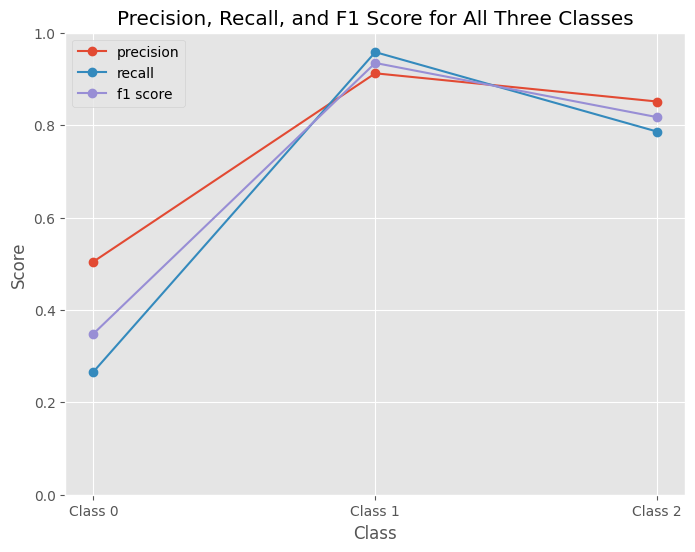

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot([0, 1, 2], precision, 'o-', label='precision')
ax.plot([0, 1, 2], recall, 'o-', label='recall')
ax.plot([0, 1, 2], f1_score, 'o-', label='f1 score')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Precision, Recall, and F1 Score for All Three Classes')

ax.legend(loc='best')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, PLogR)
print(cm)

[[ 111  281   25]
 [  99 5546  144]
 [  10  253  966]]


##Model 3: Mutltinomial NB

In [ ]:
p2 = Pipeline([
     ('tfidf', TfidfVectorizer(analyzer=data_processing)),
     ('smote', SMOTE(sampling_strategy={0: 4052}, random_state=101)),
     ('classifier', MultinomialNB())
])

In [ ]:
p2.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function data_processing at 0x7f332c9881f0>)),
                ('smote', SMOTE(random_state=101, sampling_strategy={0: 4052})),
                ('classifier', MultinomialNB())])

In [ ]:
PKN = p2.predict(X_test)
print(classification_report(y_test, PKN))

              precision    recall  f1-score   support

           0       0.54      0.17      0.25       417
           1       0.81      0.99      0.89      5789
           2       0.96      0.15      0.26      1229

    accuracy                           0.81      7435
   macro avg       0.77      0.44      0.47      7435
weighted avg       0.82      0.81      0.75      7435



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, PKN, average=None, labels=[0, 1, 2])

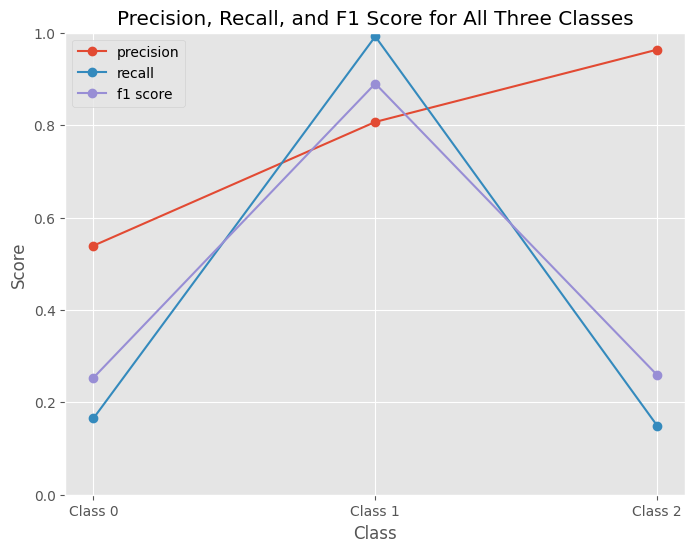

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot([0, 1, 2], precision, 'o-', label='precision')
ax.plot([0, 1, 2], recall, 'o-', label='recall')
ax.plot([0, 1, 2], f1_score, 'o-', label='f1 score')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Precision, Recall, and F1 Score for All Three Classes')

ax.legend(loc='best')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, PKN)
print(cm)

[[  69  347    1]
 [  41 5742    6]
 [  18 1027  184]]


##Validation

In [ ]:
pipeline.fit(X_train, y_train)
p1.fit(X_train, y_train)
p2.fit(X_train, y_train)

PP_train_score = pipeline.score(X_train, y_train)
PP_test_score = pipeline.score(X_test, y_test)

PLogR_train_score = p1.score(X_train, y_train)
PLogR_test_score = p1.score(X_test, y_test)

PKN_train_score = p2.score(X_train, y_train)
PKN_test_score = p2.score(X_test, y_test)

print("Pipeline 1 - Random Forest")
print("Training score: {:.3f}".format(PP_train_score))
print("Testing score: {:.3f}".format(PP_test_score))

print("\nPipeline 2 - Logistic Regression")
print("Training score: {:.3f}".format(PLogR_train_score))
print("Testing score: {:.3f}".format(PLogR_test_score))

print("\nPipeline 3 - Multinomial Naive Bayes")
print("Training score: {:.3f}".format(PKN_train_score))
print("Testing score: {:.3f}".format(PKN_test_score))


Pipeline 1 - Random Forest
Training score: 0.997
Testing score: 0.891

Pipeline 2 - Logistic Regression
Training score: 0.947
Testing score: 0.884

Pipeline 3 - Multinomial Naive Bayes
Training score: 0.854
Testing score: 0.806


Pipeline 1 is overfitting

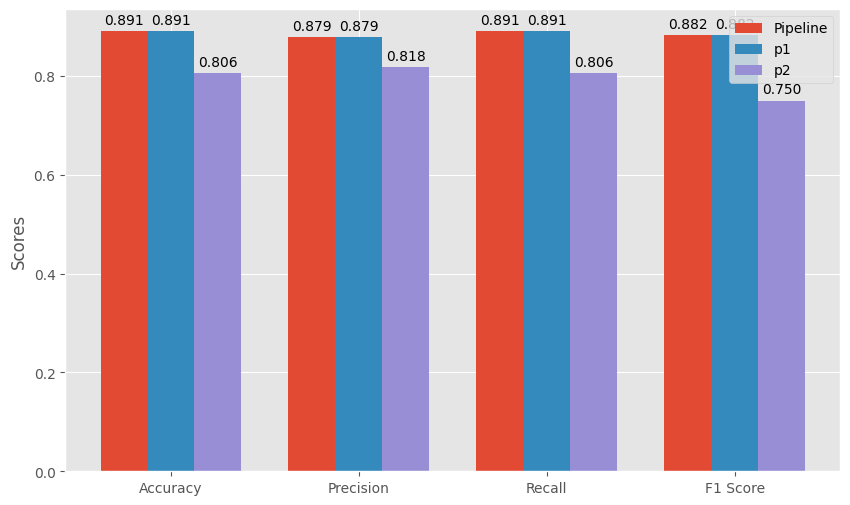

In [ ]:
PP_acc = accuracy_score(y_test, PP)
PP_prec = precision_score(y_test, PP, average='weighted')
PP_rec = recall_score(y_test, PP, average='weighted')
PP_f1 = f1_score(y_test, PP, average='weighted')

p1_acc = accuracy_score(y_test, PLogR)
p1_prec = precision_score(y_test, PLogR, average='weighted')
p1_rec = recall_score(y_test, PLogR, average='weighted')
p1_f1 = f1_score(y_test, PLogR, average='weighted')

p2_acc = accuracy_score(y_test, PKN)
p2_prec = precision_score(y_test, PKN, average='weighted')
p2_rec = recall_score(y_test, PKN, average='weighted')
p2_f1 = f1_score(y_test, PKN, average='weighted')

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
pipeline_scores = [PP_acc, PP_prec, PP_rec, PP_f1]
p1_scores = [p1_acc, p1_prec, p1_rec, p1_f1]
p2_scores = [p2_acc, p2_prec, p2_rec, p2_f1]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, pipeline_scores, width, label='Pipeline')
rects2 = ax.bar(x, p1_scores, width, label='p1')
rects3 = ax.bar(x + width, p2_scores, width, label='p2')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()
